=== Batch Similarity Search for example_data/trajectory_curve_left_sharp.json ===
Comparing against 7 files...
Error processing example_data/trajectory_left_turn_into_other_car.json: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

Similarity Results (sorted by similarity):
--------------------------------------------------
 1. example_data/trajectory_turn_left_2.json 0.8766


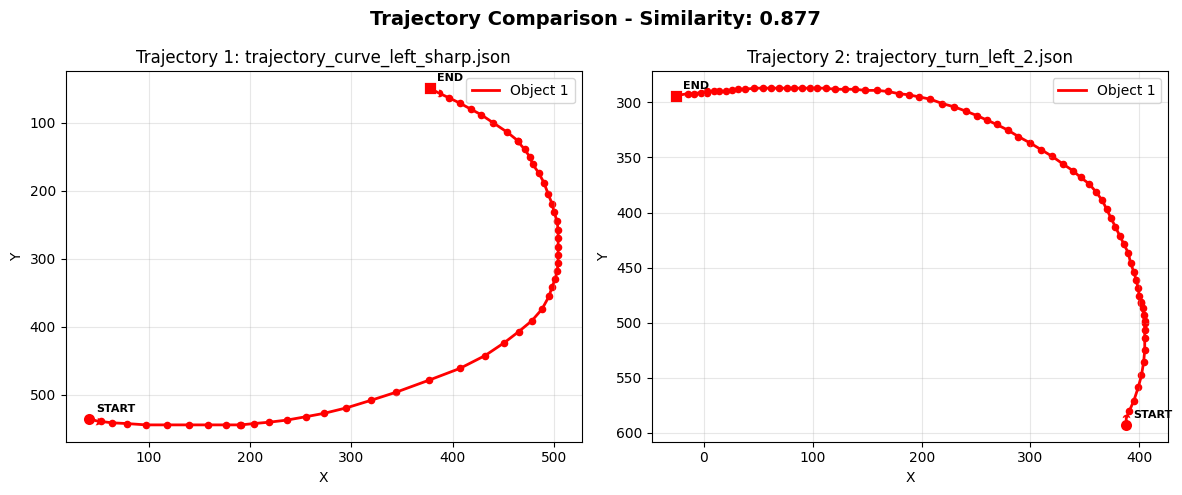

 2. example_data/trajectory_turn_left3.json 0.8340


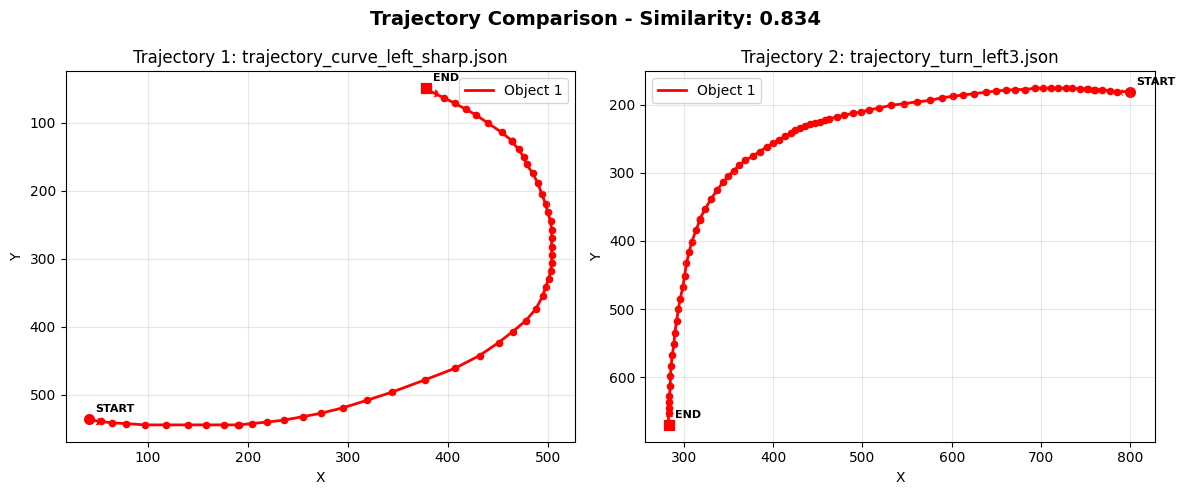

 3. example_data/trajectory_curve_left.json 0.8166


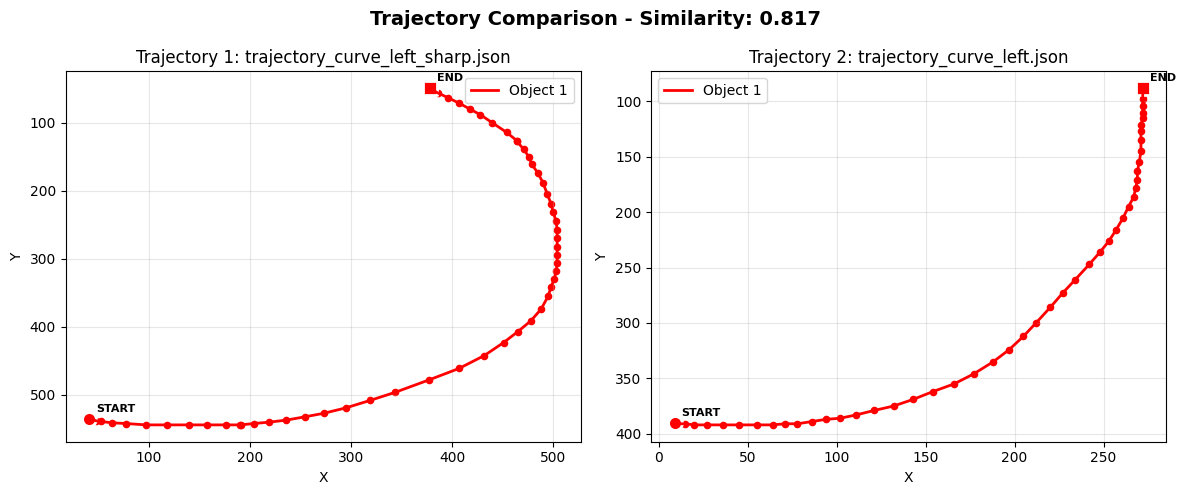

 4. example_data/trajectory_curve_right.json 0.1825


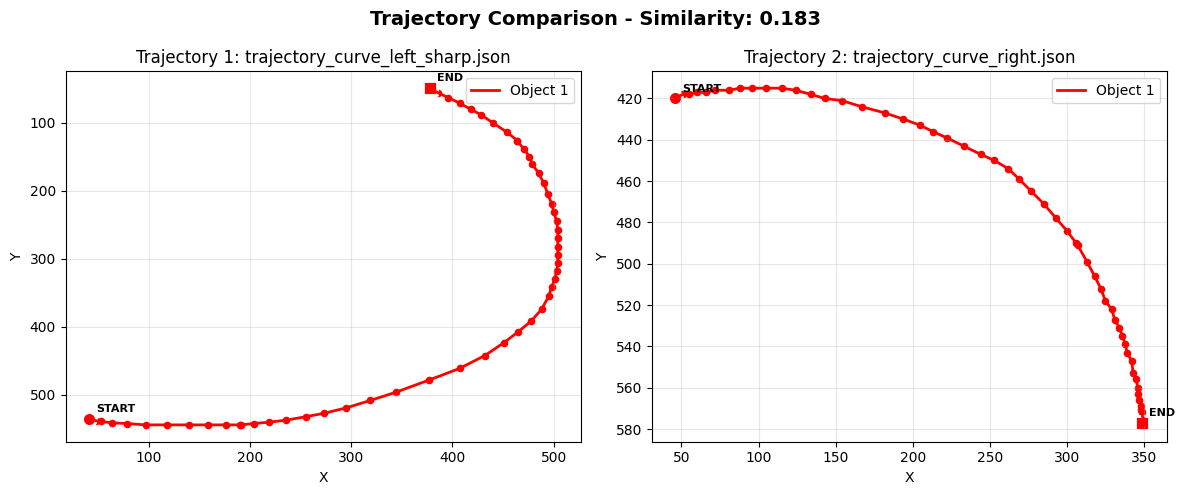

 5. example_data/trajectory_eblow_right.json 0.0463


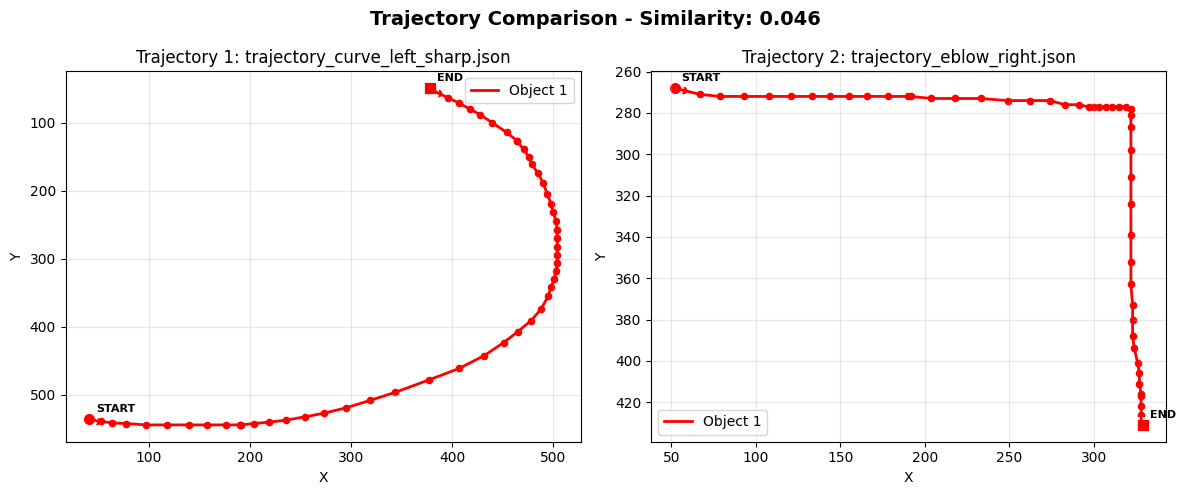

 6. example_data/trajectory_elbow_left.json 0.0456


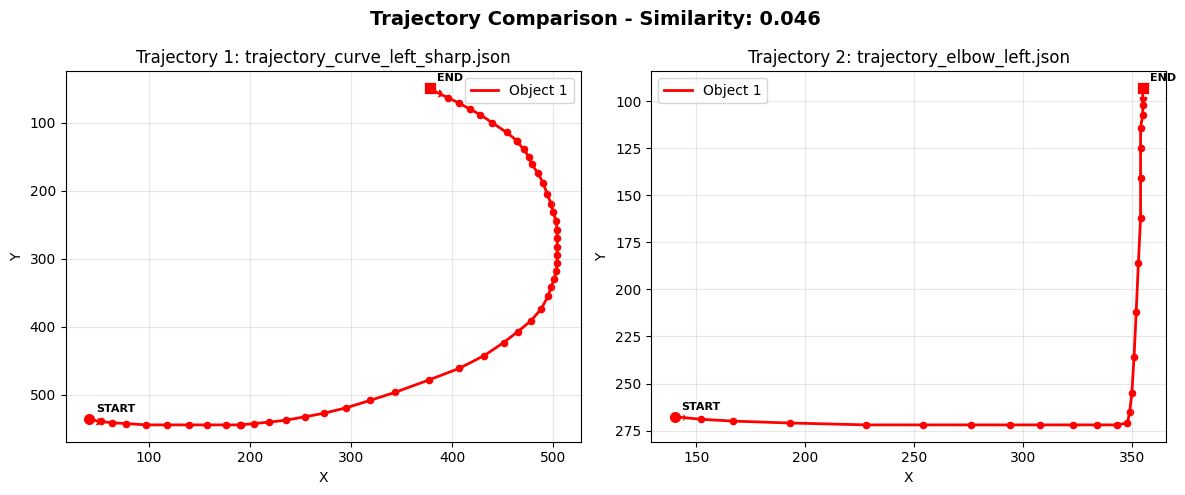

 7. example_data/trajectory_left_turn_into_other_car.json 0.0000


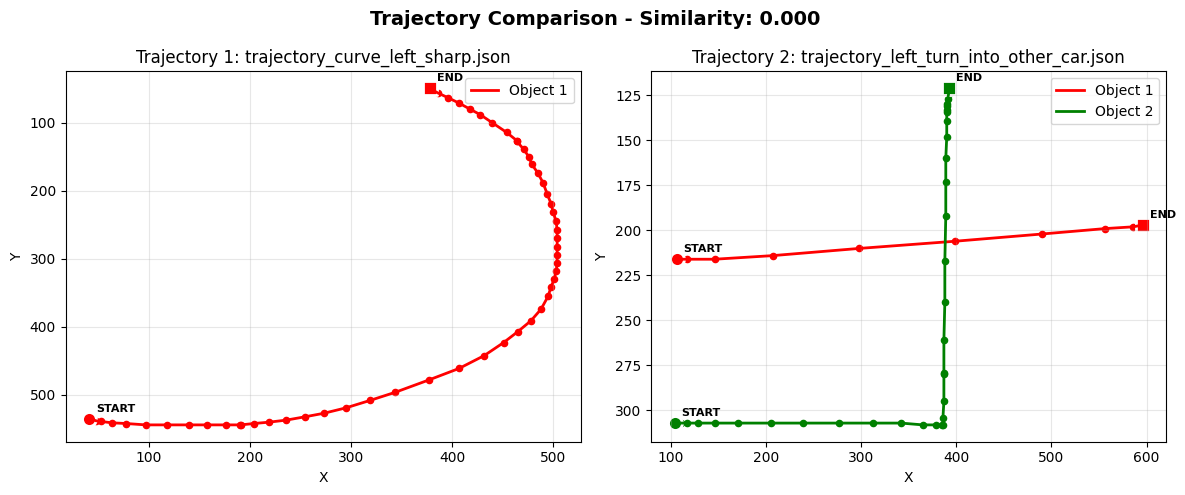

[('example_data/trajectory_turn_left_2.json', 0.8766373991966248),
 ('example_data/trajectory_turn_left3.json', 0.8340093493461609),
 ('example_data/trajectory_curve_left.json', 0.816554069519043),
 ('example_data/trajectory_curve_right.json', 0.18250788748264313),
 ('example_data/trajectory_eblow_right.json', 0.04634818062186241),
 ('example_data/trajectory_elbow_left.json', 0.04564901441335678),
 ('example_data/trajectory_left_turn_into_other_car.json', 0.0)]

In [1]:

from model.model import EncoderModelWrapper
from model.model import EncoderCentroidLarger

modelPath = "model.pth"
model = EncoderModelWrapper(modelPath, EncoderCentroidLarger(), "cuda:0", False)

# Trajectory Loading and Comparison Functions

from drawer.trajectory_loader import (
    batch_compare_trajectories,
    visualize_trajectory_comparison,
    list_trajectory_files
)

def batch_similarity_search(query_file: str):
    """Perform batch similarity search against all trajectory files."""
    print(f"=== Batch Similarity Search for {query_file} ===")
    
    trajectory_files = list_trajectory_files("example_data/")
    if not trajectory_files:
        print("No trajectory files found!")
        return
    
    if query_file not in trajectory_files:
        print(f"Query file {query_file} not found in trajectory files!")
        return
    
    # Remove query file from comparison list
    comparison_files = [f for f in trajectory_files if f != query_file]
    
    if not comparison_files:
        print("No other trajectory files to compare against!")
        return
    
    print(f"Comparing against {len(comparison_files)} files...")
    
    # Perform batch comparison
    results = batch_compare_trajectories(query_file, comparison_files, model)
    
    print("\nSimilarity Results (sorted by similarity):")
    print("-" * 50)
    for i, (filename, score) in enumerate(results):
        print(f"{i+1:2d}. {filename:30s} {score:.4f}")
        visualize_trajectory_comparison(query_file, filename, score)
    
    return results

batch_similarity_search("example_data/trajectory_curve_left_sharp.json")




In [ ]:
import torch
from utils import centroids2model_input, rotate_clip_centroids
from drawer.trajectory_loader import load_trajectory_as_centroids

query_centroids = load_trajectory_as_centroids("example_data/trajectory_curve_left_sharp.json")
print(f"Loaded centroids shape: {query_centroids.shape}")

# Create rotation-averaged inputs
q_inputs = [centroids2model_input(query_centroids)]
for _ in range(100):
    q_inputs.append(centroids2model_input(rotate_clip_centroids(query_centroids)))

# Stack inputs (this would normally be passed to the model)
stacked_inputs = torch.stack(q_inputs)
embeds = model.net(stacked_inputs.to(model.device))
embed_avg = torch.mean(embeds, dim=0)

Loaded centroids shape: (1, 58, 2)
